In [2]:
from sklearn import datasets
digit_dataset = datasets.load_digits()
digit_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
digit_dataset["images"].shape

(1797, 8, 8)

In [4]:
digit_dataset["target"][0]

0

In [5]:
digit_dataset["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

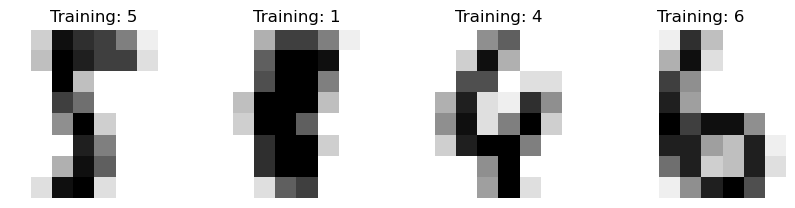

In [6]:
import matplotlib.pyplot as plt
from random import randint
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))  # (1)

for ax in axes:  # (2)
    num = randint(1, 1000)  # (3)
    image = digit_dataset["images"][num]
    label = digit_dataset["target"][num]    
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')  # (4)
    ax.set_title('Training: %i' % label)

In [7]:
digit_dataset["data"][0].shape

(64,)

In [8]:
from sklearn.model_selection import train_test_split

X = digit_dataset["data"]   # (1)
y = digit_dataset["target"]   # (1)
X_train, X_test, y_train, y_test = train_test_split(X, y)   # (2)

In [9]:
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class="ovr")
logreg_softmax = LogisticRegression(multi_class="multinomial", solver="sag")

logreg_ovr.fit(X_train, y_train)
logreg_softmax.fit(X_train, y_train)

c:\Users\WSU\anaconda3\envs\py311\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\WSU\anaconda3\envs\py311\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [10]:
from sklearn.metrics import confusion_matrix
y_pred = logreg_ovr.predict(X_test).copy()
y_true = y_test.copy()
confusion_matrix(y_true, y_pred)

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 54,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 46,  0,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 44,  0,  0,  0,  4],
       [ 0,  1,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 40,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  2, 45]], dtype=int64)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.92      0.98      0.95        45
           2       0.98      0.98      0.98        55
           3       0.96      0.92      0.94        50
           4       1.00      0.95      0.97        40
           5       0.98      0.92      0.95        48
           6       1.00      0.98      0.99        46
           7       0.98      1.00      0.99        41
           8       0.93      0.93      0.93        43
           9       0.87      0.94      0.90        48

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [12]:
result = confusion_matrix(y_true, y_pred)
result.diagonal().sum() / result.sum(axis=0).sum()

0.9577777777777777

In [13]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average="micro") 

0.9577777777777777

In [14]:
precision_score(y_true, y_pred, average="macro") 

0.9606403609310586

In [15]:
precision_score(y_true, y_pred, average=None)

array([1.        , 0.91666667, 0.98181818, 0.95833333, 1.        ,
       0.97777778, 1.        , 0.97619048, 0.93023256, 0.86538462])

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(z))

def hypothesis_function(x, theta):
    z = (np.dot(-x, theta))
    return sigmoid(z)

def compute_cost(x, y, theta):
    m = y.shape[0]
    J = (-1.0/m)*(y.T.dot(np.log(hypothesis_function(x,theta))) +
                  (1-y).T.dot(np.log(1-hypothesis_function(x,theta))))
    return J

In [17]:
def minimize_gradient(x, y, theta, iterations=100000, alpha=0.01):
    m = y.size
    cost_history=[]
    theta_history=[]
    
    for _ in range(iterations):
        original_theta = theta
        for i in range(theta.size):
            partial_margin=x[:, i].reshape(x.shape[0], 1)
            delta = hypothesis_function(x, original_theta)-y
            grad_i = delta.T.dot(partial_margin)
            theta[i] = theta[i]-(alpha*grad_i)
        if(_%100) == 0:
            theta_history.append(theta)
            cost_history.append(compute_cost(x, y, theta))
            
    return theta, np.array(cost_history), np.array(theta_history)